In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
boston = pd.read_csv("BostonHousing.csv")

In [29]:
print("Shape of dataset:", boston.shape)

Shape of dataset: (506, 14)


In [30]:
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [31]:
print(boston.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [32]:
boston = boston.dropna()

In [33]:
x = boston.drop('medv', axis=1)
y = boston['medv']

In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [36]:
model = Sequential()
model.add(Input(shape=(xtrain.shape[1],)))
model.add(Dense(1))

In [37]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [38]:
model.fit(xtrain, ytrain, epochs=100, verbose=0, validation_data=(xtest, ytest))

In [39]:
y_pred = model.predict(xtest).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


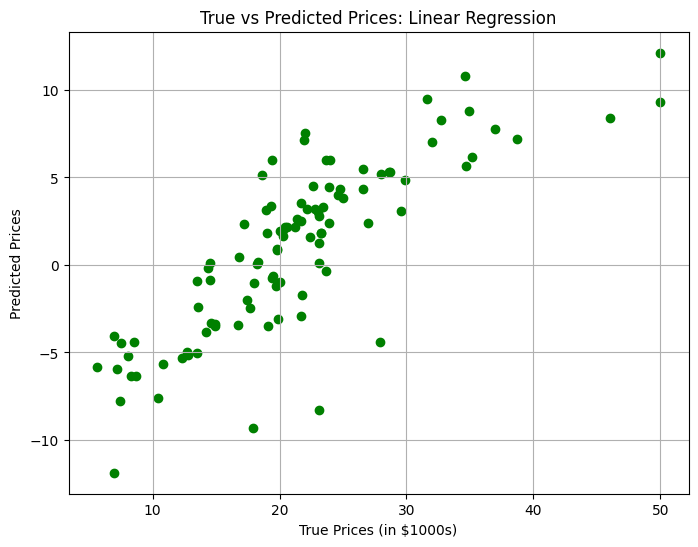

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(ytest, y_pred, c='green')
plt.xlabel("True Prices (in $1000s)")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted Prices: Linear Regression")
plt.grid(True)
plt.show()

In [41]:

mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 440.56246658323903
Mean Absolute Error: 20.27850617736873
